In [39]:
import numpy as np
data = np.genfromtxt('/Users/telmo/Dropbox/phantomgrenzen/scales-metrics/paris-log-herfindahl.csv', names=['per', 'dist', 'metric'], skip_header=1, delimiter=',')

/Users/telmo/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


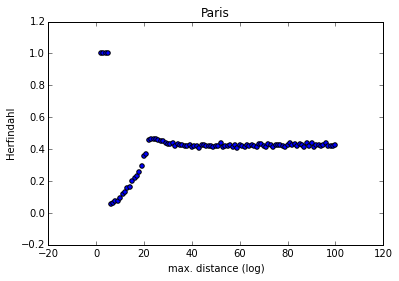

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(data['per'], data['metric'])
plt.title('Paris')
plt.xlabel('max. distance (log)')
plt.ylabel('Herfindahl')
plt.show()